# Converting photometry table from interactive photometry tool to a light curve

-Example WASP-36 b


Code Improvement notes
- needs ability to remove miss-clicked stars
- a guess for identical psf locations on next frame with ability to edit if they look incorrect
- ^reuse previous aperatures option? 
- update on psf photometry click not next click (prob with last frame)
- start next frame at same zoom level
- Save table to csv
- print statement on interface?
- quality flag button

New Code improvement notes
- still needs save dataframe to csv command
- Dropped observation time column? Not cool 
- still needs an undo star selection option 




In [13]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time

Point to reduced data path, or wherever frame_info and photometry results were saved

In [12]:
!pwd

/Users/bencapistrant/Documents/GitHub/rho_data_reduction_pipeline/photometry_mplw


In [53]:
path = '/Users/bencapistrant/Documents/GitHub/rho_data_reduction_pipeline/data/WASP36b/Reduced/'

In [345]:
raw = pd.read_csv(path+'WASP-36B_psf_photometry_results.csv')
raw

,File,Star_1_x,Star_1_y,Star_1_flux,Star_1_noise,Star_2_x,Star_2_y,Star_2_flux,Star_2_noise,Star_3_x,Star_3_y,Star_3_flux,Star_3_noise,Star_4_x,Star_4_y,Star_4_flux,Star_4_noise
0,WASP36B.2025-02-17.0132_reduced.fits,543,406,248148.402715,1507.512927,425,340,277059.205747,1585.209498,545,279,147308.673091,1246.382107,541,616,455174.662179,1952.934114
1,WASP36B.2025-02-17.0167_reduced.fits,543,406,256513.007623,1527.643719,425,340,283759.599626,1591.452431,545,279,152151.922911,1251.222103,541,616,478636.723439,1994.870990
2,WASP36B.2025-02-17.0135_reduced.fits,543,406,274211.948485,1578.635826,425,340,300636.043023,1638.630087,545,279,158203.186044,1268.762712,541,616,490090.507979,2014.287268
3,WASP36B.2025-02-17.0160_reduced.fits,543,406,233516.917499,1457.724672,425,340,257913.632452,1513.778287,545,279,136459.129558,1177.658990,541,616,428910.235704,1881.644710
4,WASP36B.2025-02-17.0175_reduced.fits,543,406,242224.270848,1487.230509,425,340,265394.722031,1543.083118,545,279,143407.200397,1223.052587,541,616,449449.047435,1936.191804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,WASP36B.2025-02-17.0188_reduced.fits,543,406,229046.616449,1456.509345,425,340,246652.074600,1496.120158,545,279,134835.762639,1197.182814,541,616,421988.484634,1885.224821
60,WASP36B.2025-02-17.0141_reduced.fits,543,406,83713.362506,870.087864,425,340,100943.882707,948.884711,545,279,52101.523303,733.338802,541,616,165252.267548,1170.525243
61,WASP36B.2025-02-17.0146_reduced.fits,543,406,249355.821825,1508.506724,425,340,287800.721179,1611.575022,545,279,148843.071157,1241.526039,541,616,464965.750923,1963.761604
62,WASP36B.2025-02-17.0153_reduced.fits,543,406,252224.571898,1521.188623,425,340,284211.036945,1596.140100,545,279,150788.278831,1251.894837,541,616,468305.748789,1971.440944


In [346]:
obs_info = pd.read_csv(path+'frame_info.csv')
obs_info

,Directory,File,Object,Date-Obs,Filter,Exptime,Dark Current,Read Noise,Flat Noise
0,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0132_reduced.fits,WASP-36B,2025-02-18T01:44:30.345,R,150.0,9.886016,42.597653,0.053058
1,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0167_reduced.fits,WASP-36B,2025-02-18T03:15:50.730,R,150.0,9.886016,42.597653,0.053058
2,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0135_reduced.fits,WASP-36B,2025-02-18T01:52:14.432,R,150.0,9.886016,42.597653,0.053058
3,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0160_reduced.fits,WASP-36B,2025-02-18T02:57:57.963,R,150.0,9.886016,42.597653,0.053058
4,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0175_reduced.fits,WASP-36B,2025-02-18T03:36:17.242,R,150.0,9.886016,42.597653,0.053058
...,...,...,...,...,...,...,...,...,...
59,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0188_reduced.fits,WASP-36B,2025-02-18T04:09:30.453,R,150.0,9.886016,42.597653,0.053058
60,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0141_reduced.fits,WASP-36B,2025-02-18T02:07:33.394,R,150.0,9.886016,42.597653,0.053058
61,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0146_reduced.fits,WASP-36B,2025-02-18T02:21:08.186,R,150.0,9.886016,42.597653,0.053058
62,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0153_reduced.fits,WASP-36B,2025-02-18T02:39:07.041,R,150.0,9.886016,42.597653,0.053058


In [320]:
# obs_info.sort_values(by='Date-Obs')

In [347]:
# combined = pd.merge(raw, obs_info, left_on='File', right_on='File', how='left').sort_values(by='Date-Obs').reset_index(drop=True)
combined = pd.read_csv(path+'WASP-36B_psf_photometry_results.csv')
combined

,File,Date-Obs,Star_1_x,Star_1_y,Star_1_flux,Star_1_noise,Star_2_x,Star_2_y,Star_2_flux,Star_2_noise,Star_3_x,Star_3_y,Star_3_flux,Star_3_noise,Star_4_x,Star_4_y,Star_4_flux,Star_4_noise
0,WASP36B.2025-02-17.0132_reduced.fits,2025-02-18T01:44:30.345,543,406,248148.402715,1507.512927,425,340,277059.205747,1585.209498,545,279,147308.673091,1246.382107,541,616,455174.662179,1952.934114
1,WASP36B.2025-02-17.0167_reduced.fits,2025-02-18T03:15:50.730,543,406,256513.007623,1527.643719,425,340,283759.599626,1591.452431,545,279,152151.922911,1251.222103,541,616,478636.723439,1994.870990
2,WASP36B.2025-02-17.0135_reduced.fits,2025-02-18T01:52:14.432,543,406,274211.948485,1578.635826,425,340,300636.043023,1638.630087,545,279,158203.186044,1268.762712,541,616,490090.507979,2014.287268
3,WASP36B.2025-02-17.0160_reduced.fits,2025-02-18T02:57:57.963,543,406,233516.917499,1457.724672,425,340,257913.632452,1513.778287,545,279,136459.129558,1177.658990,541,616,428910.235704,1881.644710
4,WASP36B.2025-02-17.0175_reduced.fits,2025-02-18T03:36:17.242,543,406,242224.270848,1487.230509,425,340,265394.722031,1543.083118,545,279,143407.200397,1223.052587,541,616,449449.047435,1936.191804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,WASP36B.2025-02-17.0188_reduced.fits,2025-02-18T04:09:30.453,543,406,229046.616449,1456.509345,425,340,246652.074600,1496.120158,545,279,134835.762639,1197.182814,541,616,421988.484634,1885.224821
60,WASP36B.2025-02-17.0141_reduced.fits,2025-02-18T02:07:33.394,543,406,83713.362506,870.087864,425,340,100943.882707,948.884711,545,279,52101.523303,733.338802,541,616,165252.267548,1170.525243
61,WASP36B.2025-02-17.0146_reduced.fits,2025-02-18T02:21:08.186,543,406,249355.821825,1508.506724,425,340,287800.721179,1611.575022,545,279,148843.071157,1241.526039,541,616,464965.750923,1963.761604
62,WASP36B.2025-02-17.0153_reduced.fits,2025-02-18T02:39:07.041,543,406,252224.571898,1521.188623,425,340,284211.036945,1596.140100,545,279,150788.278831,1251.894837,541,616,468305.748789,1971.440944


In [322]:
from itertools import product
import pickle

import ipywidgets as ipw
import numpy as np

from matplotlib import pyplot as plt
from astropy.table import Table

from stellarphot.analysis.transit_fitting import TransitModelFit
from stellarphot.visualization.transit_plots import *
from stellarphot.visualization.fits_opener import FitsOpener

from astropy.timeseries import BinnedTimeSeries, TimeSeries, aggregate_downsample
from astropy.time import Time
from astropy.table import Table 
from astropy import units as u

In [323]:
# fo = FitsOpener(title="Select your photometry/flux file", filter_pattern=["*.csv", "*.fits"])

In [348]:
t =[]
for i in range(len(combined)):
    t.append(Time(combined.at[i, 'Date-Obs'], format='isot', scale='utc').jd)

sorted_indices = np.argsort(t)


In [352]:
np.array(t)[sorted_indices]

array([2460724.56901608, 2460724.57079479, 2460724.57257344,
       2460724.57436356, 2460724.57613755, 2460724.57794481,
       2460724.58326677, 2460724.58503203, 2460724.58680341,
       2460724.58858095, 2460724.59092809, 2460724.59270366,
       2460724.59447071, 2460724.5962376 , 2460724.59801141,
       2460724.59978072, 2460724.60157925, 2460724.60335084,
       2460724.60514841, 2460724.60692013, 2460724.60871484,
       2460724.61049816, 2460724.61226271, 2460724.61403204,
       2460724.61579679, 2460724.61935068, 2460724.62181824,
       2460724.62358753, 2460724.62535462, 2460724.62713028,
       2460724.62890639, 2460724.63066876, 2460724.63244024,
       2460724.63422929, 2460724.63600382, 2460724.63777763,
       2460724.63955169, 2460724.64134696, 2460724.64312075,
       2460724.64489624, 2460724.64666786, 2460724.64843257,
       2460724.65019956, 2460724.65196323, 2460724.6537434 ,
       2460724.65552888, 2460724.65730388, 2460724.65908473,
       2460724.66085407,

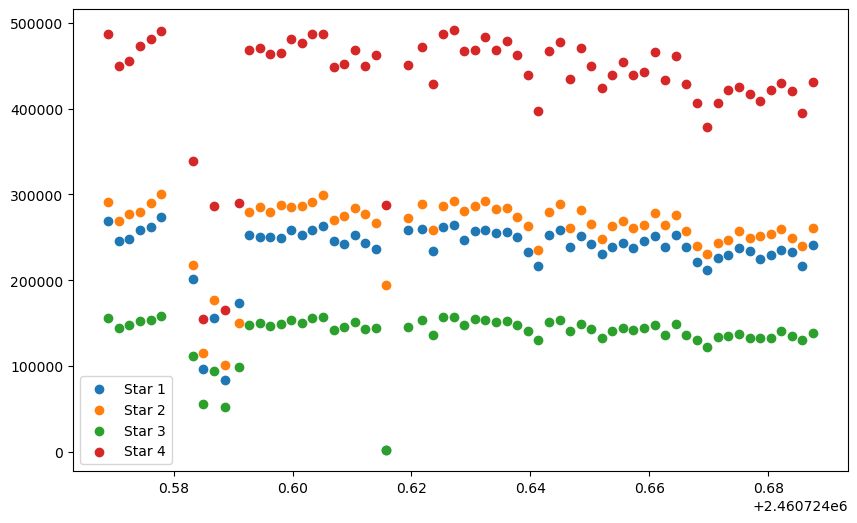

In [356]:
plt.figure(figsize=(10, 6))
# for i in [0,1,2,3,4,5,6,7,]:
for i in [0,1,2,3,]:
    plt.scatter(t,combined[f'Star_{i+1}_flux'],label=f'Star {i+1}')
    # plt.scatter(np.array(t)[sorted_indices], combined[f'Star_{i+1}_flux'][sorted_indices], marker='x', label=f'Star {i+1} sorted')
    # print(i)
# plt.scatter(t, wasp36['sum_flux'],label='WASP-36b',)
# [plt.scatter(t, refs[i]['sum_flux'], marker='x',label=f'ref {i+1}') for i in range(len(refs))]
    plt.legend()    

In [357]:
# refs = [6,7,8]
refs = [2,3,4,]
# refs = [2,4,6]
ref_flux = np.array([combined[f'Star_{i}_flux'].values for i in refs])
ref_err = np.sqrt(np.sum(np.array([combined[f'Star_{i}_noise'].values**2 for i in refs]),axis=0))
ref_corr = ref_flux.sum(axis=0)

In [358]:
wasp36_flux = combined['Star_1_flux'] / ref_corr
wasp36_err = wasp36_flux*np.sqrt((combined['Star_1_noise']/combined['Star_1_flux'])**2 + (ref_err/ref_corr)**2)

In [359]:
# Sort wasp36_flux and t by time order
sorted_indices = np.argsort(t)
wasp36_flux_sorted = wasp36_flux.values[sorted_indices]
wasp36_err_sorted = wasp36_err.values[sorted_indices]
t_sorted = np.array(t)[sorted_indices]

In [360]:
wasp36_err

0     0.001936
1     0.001884
2     0.001882
3     0.001998
4     0.001956
        ...   
59    0.002048
60    0.003064
61    0.001885
62    0.001897
63    0.001936
Length: 64, dtype: float64

(0.95, 1.1)

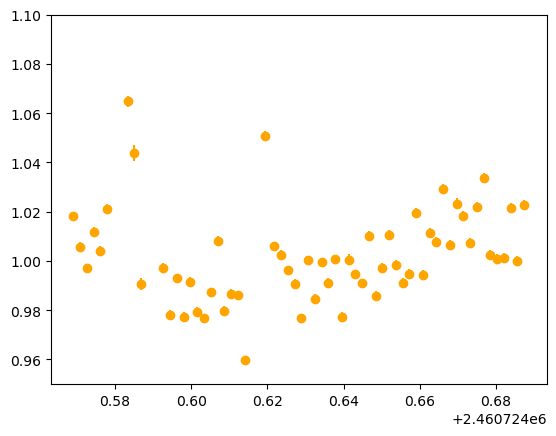

In [361]:
# plt.scatter(t,wasp36_flux, label='WASP-36b flux correction', color='orange')
plt.errorbar(t_sorted, wasp36_flux_sorted/np.nanmedian(wasp36_flux_sorted), 
             yerr=wasp36_err_sorted, 
             fmt='o', color='orange', label='WASP-36b error')
plt.ylim(0.95,1.1) 
# plt.ylim(0.75,2)
# plt.ylim(0,2.5)

(0.0, 2.5)

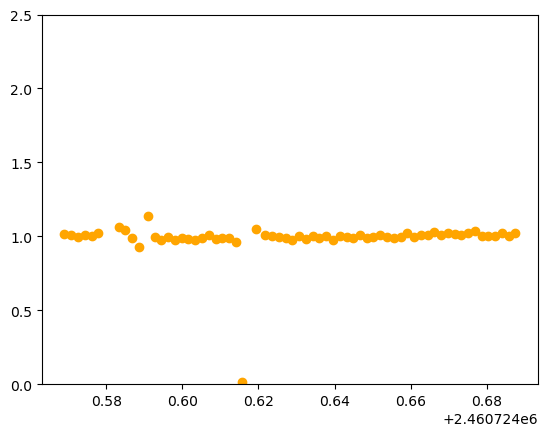

In [ ]:
# plt.scatter(t,wasp36_flux, label='WASP-36b flux correction', color='orange')
plt.errorbar(t, wasp36_flux/np.nanmedian(wasp36_flux), 
             yerr=wasp36_err, 
             fmt='o', color='orange', label='WASP-36b error')
# plt.ylim(0.9,1.1) 
# plt.ylim(0.75,2)
# plt.ylim(0,2.5)

(0.9, 1.2)

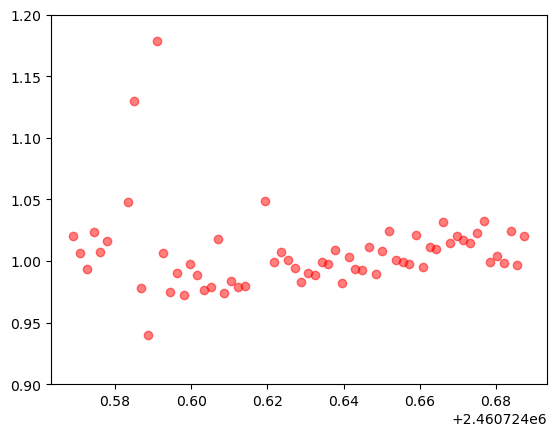

In [312]:
plt.scatter(t_sorted, wasp36_flux_sorted/np.median(wasp36_flux_sorted), label='WASP-36b flux correction (sorted)', color='red', alpha=0.5)
plt.ylim(0.9,1.2) 